In [1]:
# Data Analysis and Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For File Navigation
import os

# Our NLP Library which includes Word2Vec algorithm
import gensim

# For tokenizing corpus into sentences
import nltk
from nltk.corpus import stopwords

# For tokenizing the sentences into words, lowercase them and remove punctuation marks
from gensim.utils import simple_preprocess
# For removing stopwords
from gensim.parsing.preprocessing import remove_stopwords

# Generate WordCloud
from wordcloud import WordCloud

# # PCA
from sklearn.decomposition import PCA

# Advanced Visualization for word vectors
#  import plotly.express as px
#  from plotly.offline import init_notebook_mode
#  init_notebook_mode(connected=True)

import string

c:\Users\ACG\anaconda3\envs\ProjektstudiumDataMining\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
df = pd.read_csv('C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/Datensatz/archive/Harry_Potter_Movies/Dialogue.csv', encoding='ISO-8859-1')
df

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue
0,1,1,8,4,I should have known that you would be here...P...
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad."
3,4,1,8,7,And the boy?
4,5,1,8,4,Hagrid is bringing him.
...,...,...,...,...,...
7439,7440,234,71,1,Then Slytherin House will have gained a wonder...
7440,7441,234,71,84,Really?
7441,7442,234,71,1,Really.
7442,7443,234,71,1,Ready?


In [3]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation," ")
    return text

df["Tokens"] = df["Dialogue"].str.lower().apply(remove_punctuations).apply(nltk.word_tokenize)
df["Tokens"]
df

dialoge = df["Tokens"].tolist()
filtered_tokens = []
for line in dialoge:
    line_list = []
    for token in line:
        if token.lower() not in stopwords.words('english') and token not in string.punctuation:
            line_list.append(token)

    filtered_tokens.append(line_list)

df["Tokens"] = filtered_tokens
df

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Tokens
0,1,1,8,4,I should have known that you would be here...P...,"[known, would, professor, mcgonagall]"
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru...","[good, evening, professor, dumbledore, rumours..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.","[afraid, professor, good, bad]"
3,4,1,8,7,And the boy?,[boy]
4,5,1,8,4,Hagrid is bringing him.,"[hagrid, bringing]"
...,...,...,...,...,...,...
7439,7440,234,71,1,Then Slytherin House will have gained a wonder...,"[slytherin, house, gained, wonderful, wizard, ..."
7440,7441,234,71,84,Really?,[really]
7441,7442,234,71,1,Really.,[really]
7442,7443,234,71,1,Ready?,[ready]


In [4]:
story = []

corpus = df['Dialogue'].tolist()
raw = ''.join(corpus)
raw_sent = nltk.sent_tokenize(raw)
for sent in raw_sent:
        # 3 - Removal of stopwords
        sent = remove_stopwords(sent)
        
        # 4 - Removal of punctuation marks 
        # 5 - Tokenization of sentences to words
        story.append(simple_preprocess(sent))
story = [x for x in story if x]

In [5]:
story

[['known',
  'here',
  'professor',
  'mcgonagall',
  'good',
  'evening',
  'professor',
  'dumbledore'],
 ['are', 'rumours', 'true', 'albus', 'afraid', 'so', 'professor'],
 ['the',
  'good',
  'bad',
  'and',
  'boy',
  'hagrid',
  'bringing',
  'him',
  'do',
  'think',
  'wise',
  'trust',
  'hagrid',
  'important',
  'this',
  'ah',
  'professor',
  'trust',
  'hagrid',
  'life',
  'professor',
  'dumbledore',
  'sir'],
 ['professor', 'mcgonagall', 'no', 'problems', 'trust', 'hagrid', 'no', 'sir'],
 ['little', 'tyke', 'fell', 'asleep', 'flying', 'bristol'],
 ['heh'],
 ['try', 'wake', 'him'],
 ['there', 'go', 'albus', 'think', 'it', 'safe', 'leaving', 'people'],
 ['ve', 'watched', 'day'],
 ['they', 're', 'worst', 'sort', 'muggles', 'imaginable'],
 ['they', 'are', 'the', 'family', 'has', 'this', 'boy', 'famous'],
 ['there', 'won', 'child', 'world', 'doesn', 'know', 'name', 'exactly'],
 ['he', 'better', 'growing', 'away', 'that'],
 ['until', 'ready', 'there', 'there', 'hagrid'],
 ['i

In [6]:
story_concat = []
token_join = []

for token in story:
    tokenjoin = ' '.join(token)
    token_join.append(tokenjoin)
storyjoin = ' '.join(token_join)
story_concat.append(storyjoin)

#story_concat

In [7]:
model = gensim.models.Word2Vec(
    vector_size=1000,
    window=5,  
    min_count=3,
    workers=4,
    sg=1,
)

model.build_vocab(filtered_tokens, progress_per=1000)
model.train(filtered_tokens, total_examples=model.corpus_count, epochs=25)
#print(model.wv["love"]) Vektor anzeigen

(711770, 921175)

In [8]:
model.wv.most_similar('snape') #mit topn = 3 z.B. kann ich die begrenzen, die rauskommen

[('severus', 0.8174927234649658),
 ('potions', 0.7964221835136414),
 ('mcgonagall', 0.7831960916519165),
 ('slughorn', 0.7804970741271973),
 ('quirrell', 0.7679261565208435),
 ('grandmother', 0.7526902556419373),
 ('steal', 0.7328964471817017),
 ('teaching', 0.7328852415084839),
 ('occlumency', 0.7326405048370361),
 ('faithful', 0.7316588759422302)]

In [9]:
model.wv.doesnt_match(['dumbledore', 'ron', 'arthur', 'fred', 'george', 'ginny'])

'dumbledore'

In [10]:
model.wv.doesnt_match(['harry', 'ron', 'hermione', 'malfoy'])

'malfoy'

In [11]:
model.wv.doesnt_match(['gryffindor', 'slytherin', 'hufflepuff', 'ravenclaw', 'voldemort'])

'voldemort'

In [12]:
model.wv.similarity('ginny', 'ron')

0.68678147

In [13]:
model.wv.similarity('hermione', 'ron')

0.79774666

In [14]:
model.wv.similarity('voldemort', 'ron')

0.0956229

In [15]:
model.wv.get_normed_vectors().shape

(2063, 1000)

In [16]:
# Amount of unique words
len(model.wv.index_to_key)

2063

<function matplotlib.pyplot.show(close=None, block=None)>

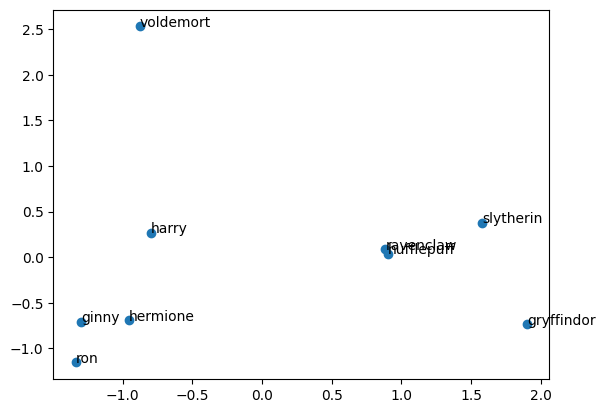

In [17]:
#ich
import sklearn
from sklearn.decomposition import PCA
from matplotlib import pyplot

words =["harry", "ron", "hermione", "voldemort", "ginny", "gryffindor", "slytherin",'hufflepuff', 'ravenclaw']
X = model.wv[words]
X
pca = PCA(n_components =2)
result = pca.fit_transform(X)
result
pyplot.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i,0],result[i,1]))
pyplot.show

In [18]:
#ich
ords = model.wv.most_similar("angry")
for word in words:
    print(word)


harry
ron
hermione
voldemort
ginny
gryffindor
slytherin
hufflepuff
ravenclaw


In [19]:
import gensim
import os
import re
import stop_words
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim.models.doc2vec import TaggedDocument
import pandas as pd

In [20]:
df_characters = pd.read_csv("C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/Datensatz/archive/Harry_Potter_Movies/Characters.csv", encoding='ISO-8859-1')
df_chardialogues = pd.merge(df, df_characters, on='Character ID', how="left")
df_dialHarry = df_chardialogues[df_chardialogues['Character ID'] == 1]
dialHarry = df_dialHarry['Tokens'].tolist()
df_dialRon = df_chardialogues[df_chardialogues['Character ID'] == 2]
df_dialHerm = df_chardialogues[df_chardialogues['Character ID'] == 3]
df_dialDumbl = df_chardialogues[df_chardialogues['Character ID'] == 4]
df_dialHagr = df_chardialogues[df_chardialogues['Character ID'] == 5]
df_dialSnape = df_chardialogues[df_chardialogues['Character ID'] == 6]
df_dialVold = df_chardialogues[df_chardialogues['Character ID'] == 9]

df_characters_list = [df_dialHarry,df_dialRon,df_dialHerm,df_dialDumbl,df_dialHagr,df_dialSnape,df_dialVold]

In [21]:
dialHarry

[['yes', 'aunt', 'petunia'],
 ['yes', 'uncle', 'vernon'],
 ['asleep'],
 ['sorry',
  'understand',
  'like',
  'lying',
  'day',
  'day',
  'people',
  'press',
  'ugly',
  'faces',
  'hear',
  'never',
  'talked',
  'snake',
  'mean',
  'talk',
  'people',
  'often',
  'burma',
  'nice',
  'miss',
  'family',
  'see',
  'well',
  'never',
  'knew',
  'parents',
  'either'],
 ['anytime'],
 ['ow'],
 ['swear', 'know', 'one', 'minute', 'glass', 'gone', 'like', 'magic'],
 ['wear'],
 ['dudley',
  'old',
  'uniform',
  'fit',
  'like',
  'bits',
  'old',
  'elephant',
  'skin'],
 ['hey', 'give', 'back', 'mine'],
 ['post', 'sunday'],
 ['get', 'ahh'],
 ['letters', 'let', 'go'],
 ['make', 'wish', 'harry'],
 [],
 ['thank'],
 ['excuse'],
 ['sorry'],
 ['learned'],
 [],
 ['made', 'mistake', 'wizard', 'mean', 'harry', 'harry'],
 ['dear',
  'mr',
  'potter',
  'pleased',
  'inform',
  'accepted',
  'hogwarts',
  'school',
  'witchcraft',
  'wizardry'],
 ['knew', 'knew', 'along', 'never', 'told'],
 ['b

In [22]:
doc = []
token = []
list = []
for line in dialHarry:
    if line.__class__ == list:
        list = ''.join(line)
        token = ' '.join(list)
        doc.append(token)
    else:
        token = ' '.join(line)
        doc.append(token)

In [ ]:
document = []
yes = []
no = []
for line in doc:
    yes = ''.join(line)
    print(yes)
    no.append(yes)
    print(no)
document.append(no)

In [24]:
story_concat = []
token_join = []

for token in doc:
    tokenjoin = ''.join(token)
    token_join.append(tokenjoin)
storyjoin = ' '.join(token_join)
story_concat.append(storyjoin)

#story_concat

In [ ]:
story_concat[0]

In [26]:
documents = [TaggedDocument(words=story_concat[0], tags=[0])]

In [28]:
tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')
p_stemmer = PorterStemmer()

taggeddoc = []
 
texts = []
for index,i in enumerate(df_characters_list):
    # for tagged doc
    wordslist = []
    tagslist = []

    # clean and tokenize document string
    raw = str(i).lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]

    # remove numbers
    number_tokens = [re.sub(r'[\d]', ' ', i) for i in stopped_tokens]
    number_tokens = ' '.join(number_tokens).split()

    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in number_tokens]
    # remove empty
    length_tokens = [i for i in stemmed_tokens if len(i) > 1]
    # add tokens to list
    texts.append(length_tokens)

    td = TaggedDocument(gensim.utils.to_unicode(str.encode(' '.join(stemmed_tokens))).split(),str(index))
    # for later versions, you may want to use: td = TaggedDocument(gensim.utils.to_unicode(str.encode(' '.join(stemmed_tokens))).split(),[str(index)])
    taggeddoc.append(td)
#taggeddoc

In [29]:
model = gensim.models.Doc2Vec(documents)

In [30]:
model.build_vocab(documents)

In [31]:
model.train(documents, total_examples=model.corpus_count, epochs=25)

In [ ]:
#??????
model['aunt']

KeyError: "Key 'aunt' not present"

In [ ]:
#meine überlegungen 
#import fastTextWordEmbedding
# data = story_concat
# idx = data.Label == "Positve";
# head(data(idx,:))

#http://de.mathworks.com/help/textanalytics/ug/train-a-sentiment-classifier.html

#from tqdm import tqdm brauchen wir glaube ich doch nicht
from gensim.models.fasttext import FastText

%%time # brauchen wir damit emb funktioniert
# fast_Text_model = FastText(taggeddoc, size = 300, window = 5, min_count=5, sample = 1e-2, workers = 4,sg=1, iter = 100) brauchen wir auch nicht
emb = fastTextWordEmbedding;
data = story_concat
idx = data.Label == "Positve";
#head(data(idx,:)) funktioniert nicht; nimmt jewiels ,: nicht an
idx = data.Label == "Negative";
#head(data(idx, : )) funktioniert auch nicht
idx = ~isVocabularyWord(emb,data.Word)
#data(idx,:) = []; funktioniert nicht

# numWords = size(data,1);
# cvp = cvpartition(numWords,'HoldOut',0.1);
# dataTrain = data(training(cvp),:);
# dataTest = data(test(cvp),:);

# wordsTrain = datTrain.Word;
# XTrain = word2vec(emb, wordsTrain);
# YTrain = datTrain.Label;

# mdl = fitcsvm(XTrain,YTrain);

# wordsTest = dataTest.Word;
# XTest = doc2vec(emb,wordsTest); #code von der Website auf doc2vec umgeändert
# YTest = data.Test.Label;

# [YPred, scores] = predict(mdl,Test);

# figure
# confusionchart(YTest,YPred);

# figure
# subplot(1,2,1)
# idx = YPred == "Positive";
# wordcloud(wordsTest(idx),scores(idx,1));
# title("Predicted Positive Sentiment")

# subplot(1,2,2)
# wordcloud(wordsTest(~idx),scores(~idx,2));
# title("Predicted Negative Sentiment")

UsageError: Line magic function `%%time` not found.
